In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
%matplotlib inline

In [3]:
data = pd.read_csv("Iris.csv")

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


In [5]:
exampleDF = data.iloc[:,[0,4,5]]

In [6]:
sns.scatterplot(data=exampleDF, x='Id',y='PetalWidthCm', hue='Species')

AttributeError: module 'seaborn' has no attribute 'scatterplot'

In [7]:
features = exampleDF.iloc[:,[0,1]].values
label = exampleDF.iloc[:,2].values

In [8]:
from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()
label = labelEncoder.fit_transform(label)
labelEncoder.classes_

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [9]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors= 3)
knn.fit(features,label)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [10]:
h = .02  # step size in the mesh
 
# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
x_min, x_max = features[:, 0].min() - 1, features[:, 0].max() + 1
y_min, y_max = features[:, 1].min() - 1, features[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))




In [11]:
data1 = np.array([xx.ravel(),yy.ravel()]).T
data1.shape

(1661000, 2)

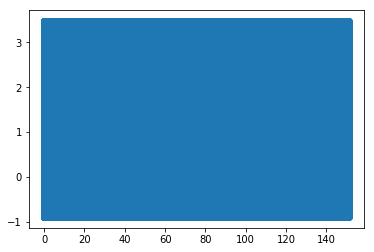

In [12]:
plt.scatter(xx,yy)

In [13]:
Z = knn.predict(data1)

In [18]:
Z

array([0, 0, 0, ..., 2, 2, 2], dtype=int64)

In [17]:
z1 = Z
labelEncoder.classes_

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [16]:
z1 = labelEncoder.transform(z1)
print(z1.shape)
z1

TypeError: '<' not supported between instances of 'str' and 'int'

In [84]:
xx.shape

(220, 7550)

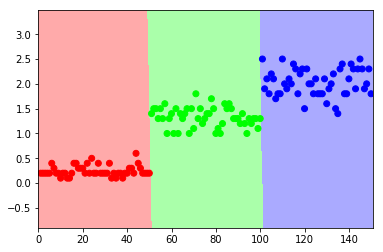

In [19]:
# Put the result into a color plot
z1 = z1.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, z1, cmap=cmap_light)
 
# Plot also the training points
plt.scatter(features[:, 0], features[:, 1],  c = label, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
 
plt.show()

In [86]:
features[3,:]

array([4. , 0.2])

In [20]:
knn.predict(np.array([[20,1000000]]))

array([2], dtype=int64)